In [ ]:
#  Predicting Employee Attrition Rate

import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_score
import torch 
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split

In [20]:
# Loading the Dataset
df = pd.read_csv("../DataSet/IBMHR_Data.csv")
print(df.head())
print(df.columns)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [21]:
# Feature Selection
target_column = 'Attrition'
print("Possible values:", df[target_column].unique())

print(df[target_column].value_counts())
print(df.isnull().sum())

Possible values: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [22]:
# Encoding the columns
df_encoded = df.copy()
categorical_cols = ['Attrition', 'Gender', 'Department', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime']
encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df[col])

In [23]:
# Dropping the irrelevant colummns
irrelevant_cols = ['EmployeeNumber', 'Over18', 'EmployeeCount']
df_encoded.drop(columns=irrelevant_cols, inplace=True)

In [24]:
# Selecting the columns in dependent variable and independent variable
selected_features = ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears']
X = df_encoded[selected_features]
y = df_encoded[target_column]

In [25]:
# Spltting the data for training and testing in 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Normalising the data by scaling it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

In [ ]:
# Evaluating the both model
def evaluate_model(y_test, y_pred, model_name):
    print(model_name)
    print(f'Accuracy Score: ', accuracy_score(y_test, y_pred))
    print(f'Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
    print(f'Classification Report: ',classification_report(y_test, y_pred))
    print(f'ROC AU`C Score: ',roc_auc_score(y_test, y_pred),"\n")

evaluate_model(y_test, y_pred_log, "Logistic Regression")

evaluate_model(y_test, y_pred_tree, "Decision Tree")

Logistic Regression
Accuracy Score:  0.8469387755102041
Confusion Matrix: 
 [[248   7]
 [ 38   1]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.12      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.50      0.50      0.48       294
weighted avg       0.77      0.85      0.80       294

ROC AUC Score:  0.49909502262443434 

Decision Tree
Accuracy Score:  0.8639455782312925
Confusion Matrix: 
 [[252   3]
 [ 37   2]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.40      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.64      0.52      0.51       294
weighted avg       0.81      0.86      0.82       294

ROC AUC Score:  0.5197586726998492 



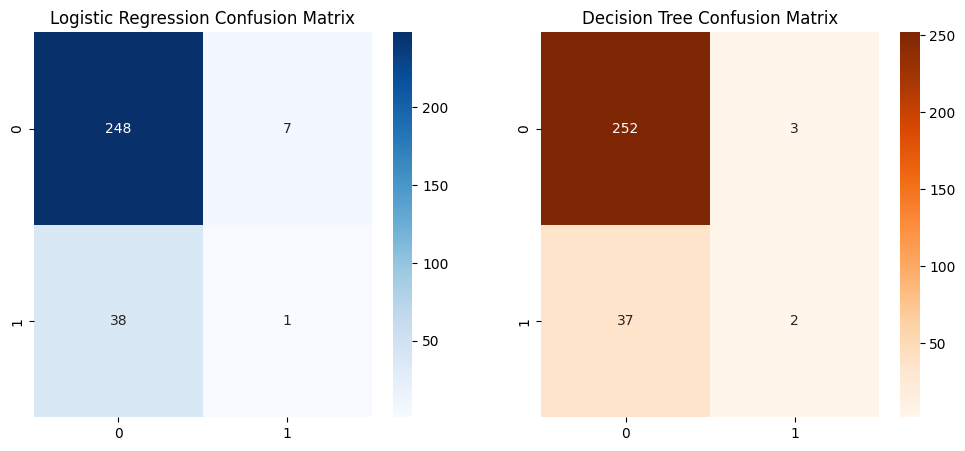

In [ ]:
fig, axes = mp.subplots(1, 2, figsize=(12, 5))
sb.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
sb.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
mp.show()

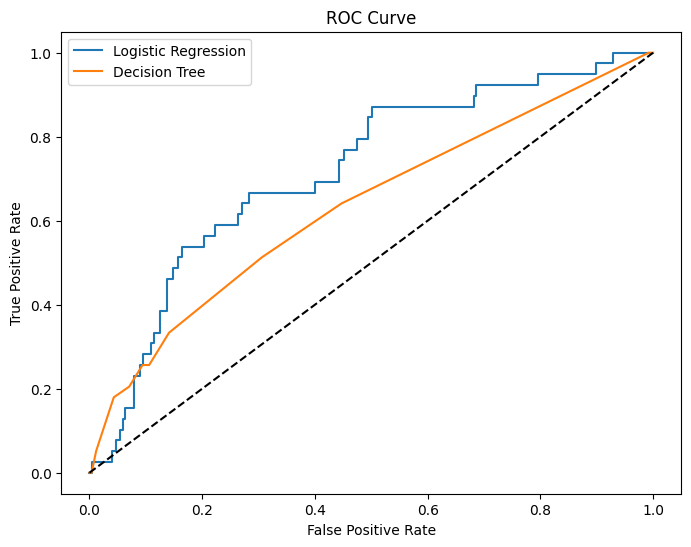

In [30]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
mp.figure(figsize=(8, 6))
mp.plot(fpr_log, tpr_log, label="Logistic Regression")
mp.plot(fpr_tree, tpr_tree, label="Decision Tree")
mp.plot([0, 1], [0, 1], 'k--')
mp.xlabel("False Positive Rate")
mp.ylabel("True Positive Rate")
mp.title("ROC Curve")
mp.legend()
mp.show()

In [31]:
print(pd.DataFrame({'Feature': selected_features, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False))
print(pd.DataFrame({'Feature': selected_features, 'Importance': decision_tree.feature_importances_}).sort_values(by='Importance', ascending=False))


print(pd.DataFrame({'Feature': selected_features, 'Odds Ratio': np.exp(log_reg.coef_[0])}).sort_values(by='Odds Ratio', ascending=False))

              Feature  Coefficient
8            OverTime     0.743378
7  NumCompaniesWorked     0.395881
3    DistanceFromHome     0.220340
4           Education     0.039453
1      BusinessTravel    -0.015765
2           DailyRate    -0.120884
6       MonthlyIncome    -0.311043
0                 Age    -0.312410
5     JobSatisfaction    -0.328226
9   TotalWorkingYears    -0.346733
              Feature  Importance
6       MonthlyIncome    0.324814
8            OverTime    0.271514
9   TotalWorkingYears    0.111428
2           DailyRate    0.108670
0                 Age    0.088986
7  NumCompaniesWorked    0.061514
5     JobSatisfaction    0.033074
1      BusinessTravel    0.000000
4           Education    0.000000
3    DistanceFromHome    0.000000
              Feature  Odds Ratio
8            OverTime    2.103027
7  NumCompaniesWorked    1.485692
3    DistanceFromHome    1.246501
4           Education    1.040242
1      BusinessTravel    0.984359
2           DailyRate    0.886137
6  

In [ ]:
# 1. Load the Dataset
df = pd.read_csv('./Dataset/IBMHR_Data.csv', encoding='ISO-8859-1')
print(df.shape)
print(df.head())

(1470, 35)
   ï»¿Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHour

In [ ]:
# MLP
# 1. Data Preprocessing
# Convert the target into binary
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
print(df['Attrition'].value_counts())
# Encoding categorical features
cat_cols = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


X = df.drop('Attrition',axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X.shape)

Attrition
0    1233
1     237
Name: count, dtype: int64
(1470, 47)


In [ ]:
#2. Train test split
Xt = torch.tensor(X_scaled, dtype=torch.float32)
yt =  torch.tensor(y, dtype=torch.float32).view(-1,1)

# Train/validation split
dataset = TensorDataset(Xt, yt)
n_total = len(dataset)
n_val = int(0.2*n_total)
n_train = n_total - n_val
train_ds, val_ds = random_split(dataset, [n_train,n_val])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

In [ ]:
#3. Define MLP model
class IBMHR(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1)
        )
    
    def forward(self,x):
        return self.net(x)
    
model = IBMHR(input_dim=X.shape[1])

In [ ]:
# Criterion & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
#4. Training Step
EPOCHS = 100
for epoch in range(1, EPOCHS+1):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits,yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)

    # Validation
    model.eval()
    val_loss, val_logits, val_targets = 0,[],[]
    with torch.no_grad():
        for xb, yb in val_loader:
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item() * xb.size(0)
            val_logits.append(logits)
            val_targets.append(yb)
        val_logits = torch.cat(val_logits)
        val_targets = torch.cat(val_targets)

        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs >=0.5 ).float()
        val_acc = accuracy_score(val_targets.numpy(), val_preds.numpy())

        if epoch == 1 or epoch % 10 == 0:
            print(f'Epoch {epoch:03d} | Train Loss: {train_loss/n_train:.4f} |'
                f'Val Loss: {val_loss/n_val:.4f} | Val Acc: {val_acc:.2f}')

Epoch 001 | Train Loss: 0.6931 |Val Loss: 0.6085 | Val Acc: 0.84
Epoch 010 | Train Loss: 0.2842 |Val Loss: 0.3372 | Val Acc: 0.87
Epoch 020 | Train Loss: 0.1894 |Val Loss: 0.3527 | Val Acc: 0.87
Epoch 030 | Train Loss: 0.1284 |Val Loss: 0.4221 | Val Acc: 0.87
Epoch 040 | Train Loss: 0.0800 |Val Loss: 0.5174 | Val Acc: 0.86
Epoch 050 | Train Loss: 0.0460 |Val Loss: 0.6614 | Val Acc: 0.85
Epoch 060 | Train Loss: 0.0217 |Val Loss: 0.8043 | Val Acc: 0.83
Epoch 070 | Train Loss: 0.0106 |Val Loss: 0.9419 | Val Acc: 0.83
Epoch 080 | Train Loss: 0.0058 |Val Loss: 1.0658 | Val Acc: 0.84
Epoch 090 | Train Loss: 0.0035 |Val Loss: 1.1761 | Val Acc: 0.83
Epoch 100 | Train Loss: 0.0022 |Val Loss: 1.2669 | Val Acc: 0.84


In [ ]:
#5. Final Evaluation
model.eval()
with torch.no_grad():
    logits = model(Xt)
    probs = torch.sigmoid(logits).squeeze().numpy() # Here sequeeze removes the unnecessary dimensions
    preds = (probs>=0.5).astype(np.float32)

    print("\nFinal Metrics")
    print("Accuracy:",accuracy_score(y, preds))
    print("Confusion Matrix:\n",confusion_matrix(y, preds))
    print("Classification Report:\n",classification_report(y, preds))
    print("Precision Score",precision_score(y,preds))
    print("F1-score:", f1_score(y,preds))
    print("Recall:", recall_score(y,preds))


Final Metrics
Accuracy: 0.9673469387755103
Confusion Matrix:
 [[1213   20]
 [  28  209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.91      0.88      0.90       237

    accuracy                           0.97      1470
   macro avg       0.95      0.93      0.94      1470
weighted avg       0.97      0.97      0.97      1470

Precision Score 0.9126637554585153
F1-score: 0.8969957081545065
Recall: 0.8818565400843882


In [ ]:
# 6. Final Output Summary
cm = confusion_matrix(y, preds)
acc = accuracy_score(y, preds)
prec = precision_score(y, preds)
rec = recall_score(y,preds)
f1 = f1_score(y,preds)
print(f"Final Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

Final Accuracy: 0.9673 | Precision: 0.9127 | Recall: 0.8819 | F1: 0.8970
